In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random_deletion
import imputers
import utils

from importlib import reload
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score

In [2]:
# reload(imputers)
# reload(utils)

### Загрузим  и подготовим данные

1. Сделаем маску для разделения категориальных/порядковых признаков от количественных признаков.
2. Заменим все категориальные на числовые.
3. Выделим целевой вектор.
4. Отмасштабируем количественные признаки.

#### KRKP

Chess (King-Rook vs. King-Pawn) Data Set

https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29

In [3]:
krkp = pd.read_csv("dataset/kr-vs-kp.csv", header=1)

In [4]:
krkp.columns = ["col" + str(i) for i in range(1, krkp.shape[1] + 1)]

In [5]:
krkp_mask = np.ones(krkp.shape[0], dtype=bool)

In [6]:
for i in range(1, krkp.shape[1] + 1):
    if krkp_mask[i - 1]:
        krkp["col" + str(i)] = LabelEncoder().fit_transform(krkp["col" + str(i)])

In [7]:
krkp_y    = krkp["col37"]
krkp_mask = krkp_mask[:-1]
krkp.drop("col37", axis=1, inplace=True)

In [8]:
krkp    = np.array(krkp, dtype='float')
krkp_y  = np.array(krkp_y)
krkp_cv = KFold(krkp_y.shape[0],    n_folds=10, shuffle=True, random_state=798)

In [9]:
krkp

array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.]])

#### Credit-g

Statlog (German Credit Data) Data Set 

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [10]:
creditg = pd.read_csv("dataset/credit-g.csv", header=1)

In [11]:
creditg.columns = ["col" + str(i) for i in range(1, creditg.shape[1] + 1)]

In [12]:
creditg_mask     = np.ones(creditg.shape[1], dtype=bool)
creditg_mask[1]  = False
creditg_mask[4]  = False
creditg_mask[12] = False

In [13]:
for i in range(1, creditg.shape[1] + 1):
    if creditg_mask[i - 1]: 
        creditg["col" + str(i)] = LabelEncoder().fit_transform(creditg["col" + str(i)])

In [14]:
creditg_y    = creditg['col21']
creditg_mask = creditg_mask[:-1]
creditg.drop("col21", axis=1, inplace=True)

In [15]:
creditg    = np.array(creditg, dtype='float')
creditg_y  = np.array(creditg_y)
creditg_cv = KFold(creditg_y.shape[0], n_folds=10, shuffle=True, random_state=798)

In [16]:
creditg

array([[  1.,   6.,   1., ...,   0.,   1.,   1.],
       [  0.,  48.,   3., ...,   0.,   0.,   1.],
       [  3.,  12.,   1., ...,   1.,   0.,   1.],
       ..., 
       [  3.,  12.,   3., ...,   0.,   0.,   1.],
       [  1.,  45.,   3., ...,   0.,   1.,   1.],
       [  0.,  45.,   1., ...,   0.,   0.,   1.]])

In [17]:
creditg = scale(creditg)

#### Segment

Image Segmentation Data Set 

https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [18]:
segment = pd.read_csv("dataset/segment.csv",  header=1)

In [19]:
segment.columns = ["col" + str(i) for i in range(1, segment.shape[1] + 1)]

In [20]:
segment_mask     = np.zeros(segment.shape[0], dtype=bool)
segment_mask[19] = True

In [21]:
for i in range(1, segment.shape[1] + 1):
    if segment_mask[i - 1]:
        segment["col" + str(i)] = LabelEncoder().fit_transform(segment["col" + str(i)])

In [22]:
segment_y    = segment['col20']
segment_mask = segment_mask[:-1]
segment.drop("col20", axis=1, inplace=True)

In [23]:
segment    = np.array(segment, dtype='float')
segment_y  = np.array(segment_y)
segment_cv = KFold(segment_y.shape[0], n_folds=10, shuffle=True, random_state=798)

In [24]:
segment

array([[  2.18000000e+02,   1.78000000e+02,   9.00000000e+00, ...,
          7.52222000e+01,   3.18996000e-01,  -2.04055000e+00],
       [  1.13000000e+02,   1.30000000e+02,   9.00000000e+00, ...,
          2.55556000e+00,   1.00000000e+00,  -2.12325000e+00],
       [  2.02000000e+02,   4.10000000e+01,   9.00000000e+00, ...,
          1.39778000e+02,   1.99347000e-01,  -2.29992000e+00],
       ..., 
       [  8.00000000e+01,   7.20000000e+01,   9.00000000e+00, ...,
          7.44444000e+01,   3.14606000e-01,  -2.09022000e+00],
       [  9.80000000e+01,   1.33000000e+02,   9.00000000e+00, ...,
          2.77778000e+00,   1.00000000e+00,  -2.12325000e+00],
       [  1.90000000e+01,   1.47000000e+02,   9.00000000e+00, ...,
          7.00000000e+00,   7.13228000e-01,  -1.47564000e+00]])

In [25]:
segment = scale(segment)

#### Horse

Horse Colic Data Set 

https://archive.ics.uci.edu/ml/datasets/Horse+Colic

In [26]:
cols = ['col' + str(i) for i in range(28)]
horse = pd.DataFrame(columns=cols)

with open('dataset/horse-colic.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        horse = horse.append(pd.DataFrame(np.array(s.split(' ')).reshape((1, -1)), columns=cols))

In [27]:
horse[horse == '?'] = np.nan

horse_y = np.array(horse.col23, dtype=int)
horse.drop(['col2', 'col23' , 'col24', 'col25', 'col26', 'col27'], axis=1, inplace=True)

horse = np.array(horse, dtype=float)
horse_cv = KFold(horse_y.shape[0], n_folds=10, shuffle=True, random_state=798)

In [28]:
horse

array([[  2. ,   1. ,  38.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  39.2, ...,   2. ,   2. ,   3. ],
       [  2. ,   1. ,  38.3, ...,   nan,   nan,   1. ],
       ..., 
       [  1. ,   1. ,  37.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  36.5, ...,   3. ,   3.4,   1. ],
       [  1. ,   1. ,  37.2, ...,   1. ,   1. ,   3. ]])

In [29]:
horse_mask = np.ones(horse.shape[1], dtype=bool)

horse_mask[2] = False
horse_mask[3] = False
horse_mask[4] = False
horse_mask[14] = False
horse_mask[17] = False
horse_mask[18] = False
horse_mask[20] = False

In [30]:
horse

array([[  2. ,   1. ,  38.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  39.2, ...,   2. ,   2. ,   3. ],
       [  2. ,   1. ,  38.3, ...,   nan,   nan,   1. ],
       ..., 
       [  1. ,   1. ,  37.5, ...,   nan,   nan,   2. ],
       [  1. ,   1. ,  36.5, ...,   3. ,   3.4,   1. ],
       [  1. ,   1. ,  37.2, ...,   1. ,   1. ,   3. ]])

In [31]:
for i in range(horse.shape[1]):
    mask = np.isnan(horse[:, i])
    horse[~ mask, i] = scale(horse[~ mask, i])

#### Votes

Congressional Voting Records Data Set 

https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

In [32]:
cols = ['col' + str(i) for i in range(17)]
votes = pd.DataFrame(columns=cols)

with open('dataset/house-votes-84.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        votes = votes.append(pd.DataFrame(np.array(s.split(',')).reshape((1, -1)), columns=cols))

In [33]:
votes[votes == '?'] = np.nan
votes[votes == 'y'] = 1
votes[votes == 'n'] = 0

votes_y = LabelEncoder().fit_transform(votes.col0)
votes.drop('col0', axis=1, inplace=True)

votes      = np.array(votes, dtype=float)
votes_cv   = KFold(votes_y.shape[0], n_folds=10, shuffle=True, random_state=798)
votes_mask = np.ones(votes.shape[1])

In [34]:
votes

array([[  0.,   1.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   1.,   0.,  nan],
       [ nan,   1.,   1., ...,   1.,   0.,   0.],
       ..., 
       [  0.,  nan,   0., ...,   1.,   0.,   1.],
       [  0.,   0.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   1.,  nan,   0.]])

#### Cancer

Breast Cancer Wisconsin (Original) Data Set

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [35]:
cols = ['col' + str(i) for i in range(10)]
cancer = pd.DataFrame(columns=cols)

with open('dataset/breast-cancer-wisconsin.data.txt', 'r') as file:
    for s in file:
        s = s.rstrip()
        cancer = cancer.append(pd.DataFrame(np.array(s.split(',')[1:]).reshape((1, -1)), columns=cols))

In [36]:
cancer_y = np.array(cancer.col9, dtype=int)
cancer_y[cancer_y == 2] = 0
cancer_y[cancer_y == 4] = 1

cancer[cancer == '?'] = np.nan
cancer.drop('col9', axis=1, inplace=True)
cancer = np.array(cancer, dtype=float)

cancer_cv   = KFold(cancer_y.shape[0], n_folds=10, shuffle=True, random_state=798)
cancer_mask = np.zeros(cancer.shape[1])

In [37]:
cancer

array([[  5.,   1.,   1., ...,   3.,   1.,   1.],
       [  5.,   4.,   4., ...,   3.,   2.,   1.],
       [  3.,   1.,   1., ...,   3.,   1.,   1.],
       ..., 
       [  5.,  10.,  10., ...,   8.,  10.,   2.],
       [  4.,   8.,   6., ...,  10.,   6.,   1.],
       [  4.,   8.,   8., ...,  10.,   4.,   1.]])

In [38]:
for i in range(cancer.shape[1]):
    mask = np.isnan(cancer[:, i])
    cancer[~ mask, i] = scale(cancer[~ mask, i])

Заметим, что три первых датасета не имеют пропущенных значений, три последних имеют натуральные пропуски в данных.

### Сравнение методов.

##### 5 % пропущенных значений во всех объектах и всех признаках.

In [39]:
krkp_del    = random_deletion.make_missing_value(krkp,    del_fraction=0.05)
creditg_del = random_deletion.make_missing_value(creditg, del_fraction=0.05)
segment_del = random_deletion.make_missing_value(segment, del_fraction=0.05)

Для каждого из используемых методов машинного обучения будем показывать отставание методов восстановления пропусков от лучшего результата.

#### KRKP

In [40]:
res_krkp = utils.dataset_exps(krkp_del, krkp_y, krkp_mask, krkp_cv)

In [41]:
res_krkp - res_krkp.max(axis=0)

,RF,LR,kNN
ignore,-0.031873,-0.006068,-0.186695
special,-0.010326,-0.091353,-0.084504
common,-0.005324,-0.012206,-0.011895
svd,-0.005946,-0.008450,-0.013770
knn,-0.007825,-0.005322,-0.003764
rf,-0.004062,-0.002502,-0.001561
lr,0.000000,0.000000,-0.003129
em,0.000000,-0.001251,0.000000
k-means,-0.008757,-0.011576,-0.007509


#### Creditg

In [42]:
res_creditg = utils.dataset_exps(creditg_del, creditg_y, creditg_mask, creditg_cv)

In [43]:
res_creditg - res_creditg.max(axis=0)

,RF,LR,kNN
ignore,-0.012355,0.000000,-0.006906
special,-0.016000,-0.006903,-0.001000
common,-0.037000,-0.008903,-0.014000
svd,-0.028000,-0.012903,0.000000
knn,-0.022000,-0.004903,-0.009000
rf,-0.023000,-0.012903,-0.010000
lr,-0.002000,-0.008903,-0.016000
em,0.000000,-0.008903,-0.017000
k-means,-0.018000,-0.003903,-0.017000


#### Segment

In [44]:
res_segment = utils.dataset_exps(segment_del, segment_y, segment_mask, segment_cv)

In [60]:
res_segment - res_segment.max(axis=0)

,RF,LR,kNN
ignore,-0.003024,-0.004757,-0.016194
special,-0.015152,-0.048918,-0.027273
common,-0.015152,-0.022944,-0.015152
svd,-0.014719,-0.014286,-0.012121
knn,-0.003030,-0.004762,-0.002165
rf,0.000000,0.000000,0.000000
lr,-0.011255,-0.008225,-0.007359
em,-0.008225,-0.009957,-0.007792
k-means,-0.012121,-0.014719,-0.009957


#### Horse

In [46]:
res_horse = utils.dataset_exps(horse, horse_y, horse_mask, horse_cv)

In [61]:
res_horse - res_horse.max(axis=0)

,RF,LR,kNN
special,-0.013333,0.000000,0.000000
common,0.000000,-0.010000,-0.013333
svd,-0.036667,0.000000,0.000000
knn,-0.006667,-0.016667,-0.013333
rf,-0.026667,-0.023333,-0.020000
lr,-0.020000,-0.020000,-0.023333
em,-0.040000,-0.016667,0.000000
k-means,-0.033333,-0.016667,-0.003333


#### Votes

In [48]:
res_votes = utils.dataset_exps(votes, votes_y, votes_mask, votes_cv)

In [62]:
res_votes - res_votes.max(axis=0)

,RF,LR,kNN
ignore,-0.001909,-0.008326,-0.022221
special,-0.009249,-0.016332,-0.034619
common,-0.004598,-0.002326,-0.016121
svd,-0.002431,-0.006977,-0.009302
knn,-0.004598,-0.000106,-0.018446
rf,-0.009249,0.000000,-0.013848
lr,-0.009249,-0.009302,-0.011469
em,-0.004757,-0.002378,-0.009249
k-means,0.000000,-0.006977,0.000000


#### Cancer

In [50]:
res_cancer = utils.dataset_exps(cancer, cancer_y, cancer_mask, cancer_cv)

In [64]:
res_cancer - res_cancer.max(axis=0)

,RF,LR,kNN
ignore,0.000000,0.000000,0.000000
special,-0.007798,-0.000866,-0.002251
common,-0.006369,-0.002294,-0.002251
svd,-0.004941,-0.002294,-0.002251
knn,-0.002084,-0.002294,-0.002251
rf,-0.004941,-0.002294,-0.002251
lr,-0.002084,-0.002294,-0.002251
em,-0.002084,-0.002294,-0.002251
k-means,-0.002084,-0.002294,-0.002251


### Сравним для разных долей пропущенных значений.

Пропущенные значения для всех объектов в _половине_ признаков. 

In [65]:
missing_frac_range = [0.05, 0.1, 0.15, 0.2, 0.25]
num_iter = 3

In [66]:
clf = RandomForestClassifier(n_jobs=-1, random_state=666)

In [69]:
krkp_accuracy_special = []
krkp_accuracy_common  = []
krkp_accuracy_svd     = []
krkp_accuracy_knn     = []
krkp_accuracy_rf      = []
krkp_accuracy_lr      = []
krkp_accuracy_em      = []
krkp_accuracy_km      = []

krkp_rmse_special = []
krkp_rmse_common  = []
krkp_rmse_svd     = []
krkp_rmse_knn     = []
krkp_rmse_rf      = []
krkp_rmse_lr      = []
krkp_rmse_em      = []
krkp_rmse_km      = []

creditg_accuracy_special = []
creditg_accuracy_common  = []
creditg_accuracy_svd     = []
creditg_accuracy_knn     = []
creditg_accuracy_rf      = []
creditg_accuracy_lr      = []
creditg_accuracy_em      = []
creditg_accuracy_km      = []

creditg_rmse_special = []
creditg_rmse_common  = []
creditg_rmse_svd     = []
creditg_rmse_knn     = []
creditg_rmse_rf      = []
creditg_rmse_lr      = []
creditg_rmse_em      = []
creditg_rmse_km      = []

segment_accuracy_special = []
segment_accuracy_common  = []
segment_accuracy_svd     = []
segment_accuracy_knn     = []
segment_accuracy_rf      = []
segment_accuracy_lr      = []
segment_accuracy_em      = []
segment_accuracy_km      = []

segment_rmse_special = []
segment_rmse_common  = []
segment_rmse_svd     = []
segment_rmse_knn     = []
segment_rmse_rf      = []
segment_rmse_lr      = []
segment_rmse_em      = []
segment_rmse_km      = []

In [70]:
for missing_frac in missing_frac_range:
    for iteration in range(num_iter):
        krkp_del    = random_deletion.make_missing_value(krkp,    del_fraction=missing_frac, del_fraction_column=0.5)
        creditg_del = random_deletion.make_missing_value(creditg, del_fraction=missing_frac, del_fraction_column=0.5)
        segment_del = random_deletion.make_missing_value(segment, del_fraction=missing_frac, del_fraction_column=0.5)
        
        # special value
        krkp_tmp    = imputers.special_value_imputer(krkp_del)
        creditg_tmp = imputers.special_value_imputer(creditg_del)
        segment_tmp = imputers.special_value_imputer(segment_del)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_special.append(accuracy_krkp / num_iter)
            creditg_accuracy_special.append(accuracy_creditg / num_iter)
            segment_accuracy_special.append(accuracy_segment / num_iter)
            krkp_rmse_special.append(rmse_krkp / num_iter)
            creditg_rmse_special.append(rmse_creditg / num_iter)
            segment_rmse_special.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_special[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_special[-1] += accuracy_creditg / num_iter
            segment_accuracy_special[-1] += accuracy_segment / num_iter
            krkp_rmse_special[-1]    += rmse_krkp    / num_iter
            creditg_rmse_special[-1] += rmse_creditg / num_iter
            segment_rmse_special[-1] += rmse_segment / num_iter
            
        # common value
        krkp_tmp    = imputers.common_value_imputer(krkp_del,    krkp_mask)
        creditg_tmp = imputers.common_value_imputer(creditg_del, creditg_mask)
        segment_tmp = imputers.common_value_imputer(segment_del, segment_mask)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_common.append(accuracy_krkp / num_iter)
            creditg_accuracy_common.append(accuracy_creditg / num_iter)
            segment_accuracy_common.append(accuracy_segment / num_iter)
            krkp_rmse_common.append(rmse_krkp / num_iter)
            creditg_rmse_common.append(rmse_creditg / num_iter)
            segment_rmse_common.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_common[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_common[-1] += accuracy_creditg / num_iter
            segment_accuracy_common[-1] += accuracy_segment / num_iter
            krkp_rmse_common[-1]    += rmse_krkp    / num_iter
            creditg_rmse_common[-1] += rmse_creditg / num_iter
            segment_rmse_common[-1] += rmse_segment / num_iter
            
        # svd
        krkp_tmp    = imputers.svd_imputer(krkp_del,    krkp_mask,    rank=20)
        creditg_tmp = imputers.svd_imputer(creditg_del, creditg_mask, rank=20)
        segment_tmp = imputers.svd_imputer(segment_del, segment_mask, rank=20)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_svd.append(accuracy_krkp / num_iter)
            creditg_accuracy_svd.append(accuracy_creditg / num_iter)
            segment_accuracy_svd.append(accuracy_segment / num_iter)
            krkp_rmse_svd.append(rmse_krkp / num_iter)
            creditg_rmse_svd.append(rmse_creditg / num_iter)
            segment_rmse_svd.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_svd[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_svd[-1] += accuracy_creditg / num_iter
            segment_accuracy_svd[-1] += accuracy_segment / num_iter
            krkp_rmse_svd[-1]    += rmse_krkp    / num_iter
            creditg_rmse_svd[-1] += rmse_creditg / num_iter
            segment_rmse_svd[-1] += rmse_segment / num_iter
            
        # knn
        krkp_tmp    = imputers.knn_imputer(krkp_del,    krkp_mask,    n_neighbors=5)
        creditg_tmp = imputers.knn_imputer(creditg_del, creditg_mask, n_neighbors=5)
        segment_tmp = imputers.knn_imputer(segment_del, segment_mask, n_neighbors=5)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_knn.append(accuracy_krkp / num_iter)
            creditg_accuracy_knn.append(accuracy_creditg / num_iter)
            segment_accuracy_knn.append(accuracy_segment / num_iter)
            krkp_rmse_knn.append(rmse_krkp / num_iter)
            creditg_rmse_knn.append(rmse_creditg / num_iter)
            segment_rmse_knn.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_knn[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_knn[-1] += accuracy_creditg / num_iter
            segment_accuracy_knn[-1] += accuracy_segment / num_iter
            krkp_rmse_knn[-1]    += rmse_krkp    / num_iter
            creditg_rmse_knn[-1] += rmse_creditg / num_iter
            segment_rmse_knn[-1] += rmse_segment / num_iter
            
        # rf
        krkp_tmp    = imputers.rf_imputer(krkp_del,    krkp_mask)
        creditg_tmp = imputers.rf_imputer(creditg_del, creditg_mask)
        segment_tmp = imputers.rf_imputer(segment_del, segment_mask)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_rf.append(accuracy_krkp / num_iter)
            creditg_accuracy_rf.append(accuracy_creditg / num_iter)
            segment_accuracy_rf.append(accuracy_segment / num_iter)
            krkp_rmse_rf.append(rmse_krkp / num_iter)
            creditg_rmse_rf.append(rmse_creditg / num_iter)
            segment_rmse_rf.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_rf[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_rf[-1] += accuracy_creditg / num_iter
            segment_accuracy_rf[-1] += accuracy_segment / num_iter
            krkp_rmse_rf[-1]    += rmse_krkp    / num_iter
            creditg_rmse_rf[-1] += rmse_creditg / num_iter
            segment_rmse_rf[-1] += rmse_segment / num_iter
            
        # lr
        krkp_tmp    = imputers.linear_imputer(krkp_del,    krkp_mask)
        creditg_tmp = imputers.linear_imputer(creditg_del, creditg_mask)
        segment_tmp = imputers.linear_imputer(segment_del, segment_mask)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_lr.append(accuracy_krkp / num_iter)
            creditg_accuracy_lr.append(accuracy_creditg / num_iter)
            segment_accuracy_lr.append(accuracy_segment / num_iter)
            krkp_rmse_lr.append(rmse_krkp / num_iter)
            creditg_rmse_lr.append(rmse_creditg / num_iter)
            segment_rmse_lr.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_lr[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_lr[-1] += accuracy_creditg / num_iter
            segment_accuracy_lr[-1] += accuracy_segment / num_iter
            krkp_rmse_lr[-1]    += rmse_krkp    / num_iter
            creditg_rmse_lr[-1] += rmse_creditg / num_iter
            segment_rmse_lr[-1] += rmse_segment / num_iter
            
        # em
        krkp_tmp    = imputers.em_imputer(krkp_del,    krkp_mask)
        creditg_tmp = imputers.em_imputer(creditg_del, creditg_mask)
        segment_tmp = imputers.em_imputer(segment_del, segment_mask)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_em.append(accuracy_krkp / num_iter)
            creditg_accuracy_em.append(accuracy_creditg / num_iter)
            segment_accuracy_em.append(accuracy_segment / num_iter)
            krkp_rmse_em.append(rmse_krkp / num_iter)
            creditg_rmse_em.append(rmse_creditg / num_iter)
            segment_rmse_em.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_em[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_em[-1] += accuracy_creditg / num_iter
            segment_accuracy_em[-1] += accuracy_segment / num_iter
            krkp_rmse_em[-1]    += rmse_krkp    / num_iter
            creditg_rmse_em[-1] += rmse_creditg / num_iter
            segment_rmse_em[-1] += rmse_segment / num_iter
            
        # km
        krkp_tmp    = imputers.kmean_imputer(krkp_del,    krkp_mask)
        creditg_tmp = imputers.kmean_imputer(creditg_del, creditg_mask)
        segment_tmp = imputers.kmean_imputer(segment_del, segment_mask)
        accuracy_krkp    = np.mean(cross_val_score(clf, krkp_tmp,    krkp_y,    scoring='accuracy', cv=krkp_cv))
        accuracy_creditg = np.mean(cross_val_score(clf, creditg_tmp, creditg_y, scoring='accuracy', cv=creditg_cv))
        accuracy_segment = np.mean(cross_val_score(clf, segment_tmp, segment_y, scoring='accuracy', cv=segment_cv))
        rmse_krkp    = np.sum((krkp    - krkp_tmp)    ** 2) ** 0.5
        rmse_creditg = np.sum((creditg - creditg_tmp) ** 2) ** 0.5
        rmse_segment = np.sum((segment - segment_tmp) ** 2) ** 0.5
        if iteration == 0:
            krkp_accuracy_km.append(accuracy_krkp / num_iter)
            creditg_accuracy_km.append(accuracy_creditg / num_iter)
            segment_accuracy_km.append(accuracy_segment / num_iter)
            krkp_rmse_km.append(rmse_krkp / num_iter)
            creditg_rmse_km.append(rmse_creditg / num_iter)
            segment_rmse_km.append(rmse_segment / num_iter)
        else:
            krkp_accuracy_km[-1]    += accuracy_krkp    / num_iter
            creditg_accuracy_km[-1] += accuracy_creditg / num_iter
            segment_accuracy_km[-1] += accuracy_segment / num_iter
            krkp_rmse_km[-1]    += rmse_krkp    / num_iter
            creditg_rmse_km[-1] += rmse_creditg / num_iter
            segment_rmse_km[-1] += rmse_segment / num_iter

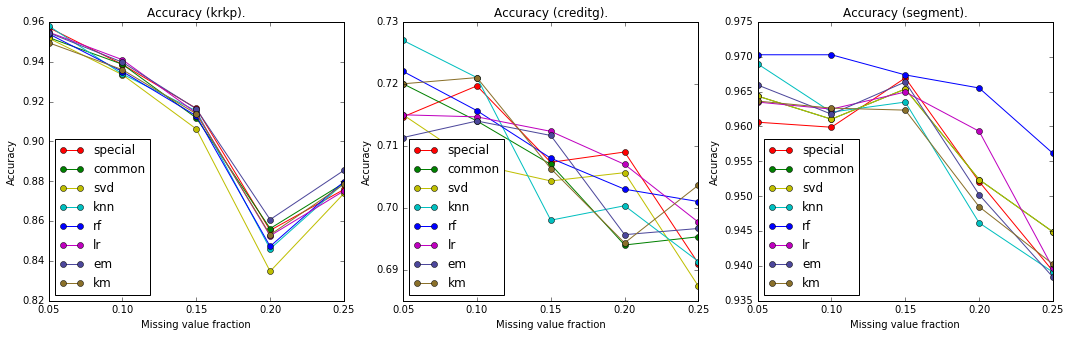

In [78]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title("Accuracy (krkp).")
plt.plot(missing_frac_range, krkp_accuracy_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, krkp_accuracy_km,      'o-',  color='#8A702A', label='km', lw=1)
plt.legend(loc='lower left')
plt.xlabel("Missing value fraction")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 2)
plt.title("Accuracy (creditg).")
plt.plot(missing_frac_range, creditg_accuracy_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, creditg_accuracy_km,      'o-',  color='#8A702A', label='km', lw=1)
plt.legend(loc='lower left')
plt.xlabel("Missing value fraction")
plt.ylabel("Accuracy")

plt.subplot(1, 3, 3)
plt.title("Accuracy (segment).")
plt.plot(missing_frac_range, segment_accuracy_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, segment_accuracy_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, segment_accuracy_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, segment_accuracy_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, segment_accuracy_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, segment_accuracy_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, segment_accuracy_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, segment_accuracy_km,      'o-',  color='#8A702A', label='km', lw=1)
plt.legend(loc='lower left')
plt.xlabel("Missing value fraction")
plt.ylabel("Accuracy")

plt.show()

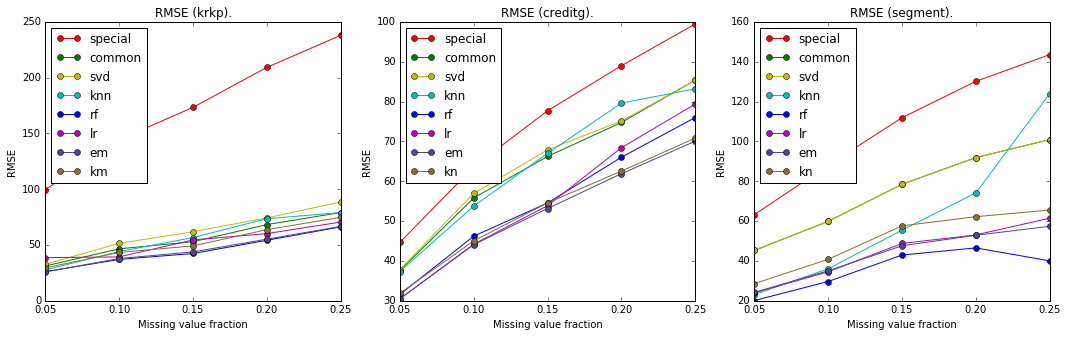

In [79]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title("RMSE (krkp).")
plt.plot(missing_frac_range, krkp_rmse_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, krkp_rmse_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, krkp_rmse_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, krkp_rmse_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, krkp_rmse_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, krkp_rmse_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, krkp_rmse_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, krkp_rmse_km,      'o-',  color='#8A702A', label='km', lw=1)
plt.legend(loc='upper left')
plt.xlabel("Missing value fraction")
plt.ylabel("RMSE")

plt.subplot(1, 3, 2)
plt.title("RMSE (creditg).")
plt.plot(missing_frac_range, creditg_rmse_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, creditg_rmse_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, creditg_rmse_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, creditg_rmse_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, creditg_rmse_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, creditg_rmse_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, creditg_rmse_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, creditg_rmse_km,      'o-',  color='#8A702A', label='kn', lw=1)
plt.legend(loc='upper left')
plt.xlabel("Missing value fraction")
plt.ylabel("RMSE")

plt.subplot(1, 3, 3)
plt.title("RMSE (segment).")
plt.plot(missing_frac_range, segment_rmse_special, 'ro-', label='special', lw=1)
plt.plot(missing_frac_range, segment_rmse_common,  'go-', label='common', lw=1)
plt.plot(missing_frac_range, segment_rmse_svd,     'yo-', label='svd', lw=1)
plt.plot(missing_frac_range, segment_rmse_knn,     'co-', label='knn', lw=1)
plt.plot(missing_frac_range, segment_rmse_rf,      'bo-', label='rf', lw=1)
plt.plot(missing_frac_range, segment_rmse_lr,      'mo-', label='lr', lw=1)
plt.plot(missing_frac_range, segment_rmse_em,      'o-',  color='#4C479B', label='em', lw=1)
plt.plot(missing_frac_range, segment_rmse_km,      'o-',  color='#8A702A', label='kn', lw=1)
plt.legend(loc='upper left')
plt.xlabel("Missing value fraction")
plt.ylabel("RMSE")

plt.show()